# **- Import Libraries**

In [2]:
import pandas as pd 
import numpy as np 
import pyodbc 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import warnings
warnings.filterwarnings("ignore")

# **- Data Representation**

In [3]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=ammar;'
    'DATABASE=Shopping;'
    'Trusted_Connection=yes;'
)


In [4]:
conn = pyodbc.connect(conn_str)

In [5]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

# **- Data Wrangling / Cleaning**

**Check Missing Values**

In [7]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

**Check Duplicates**

In [8]:
df.duplicated().sum()

np.int64(0)

**Check Outliers**

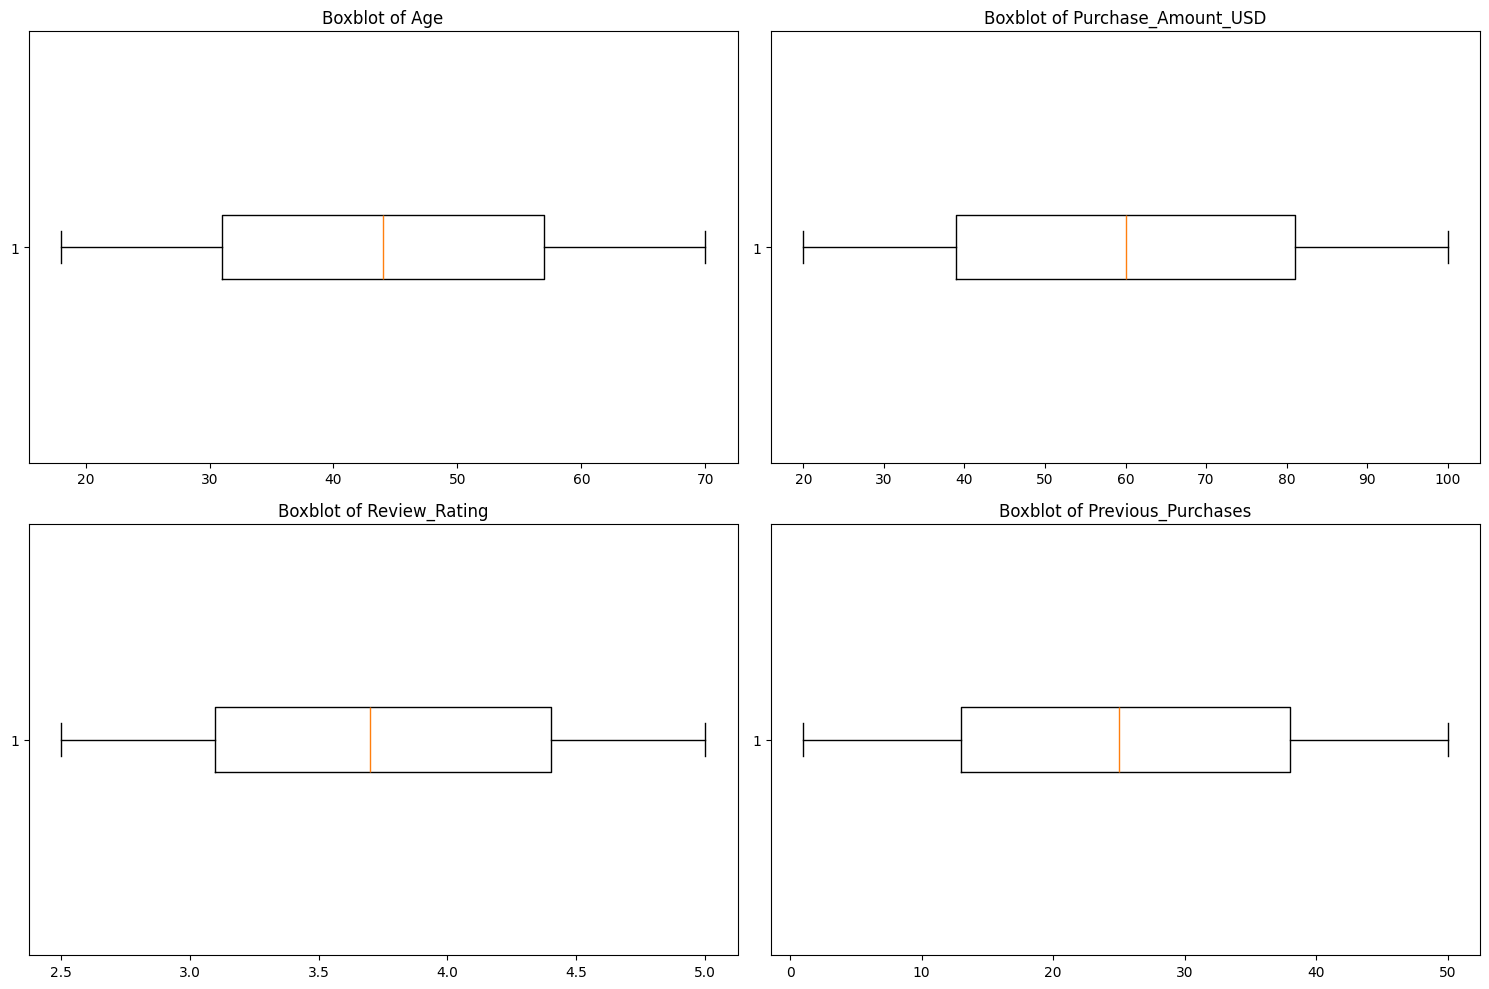

In [9]:
numeric_cols = ["Age", "Purchase_Amount_USD", "Review_Rating", "Previous_Purchases"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols, start= 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert= False)
    plt.title(f'Boxblot of {feature}')

plt.tight_layout()
plt.show()

# **- Exploratory Data Analysis**

In [10]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

**Univariate Analysis**

*Age Column*

In [12]:
df["Age"].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

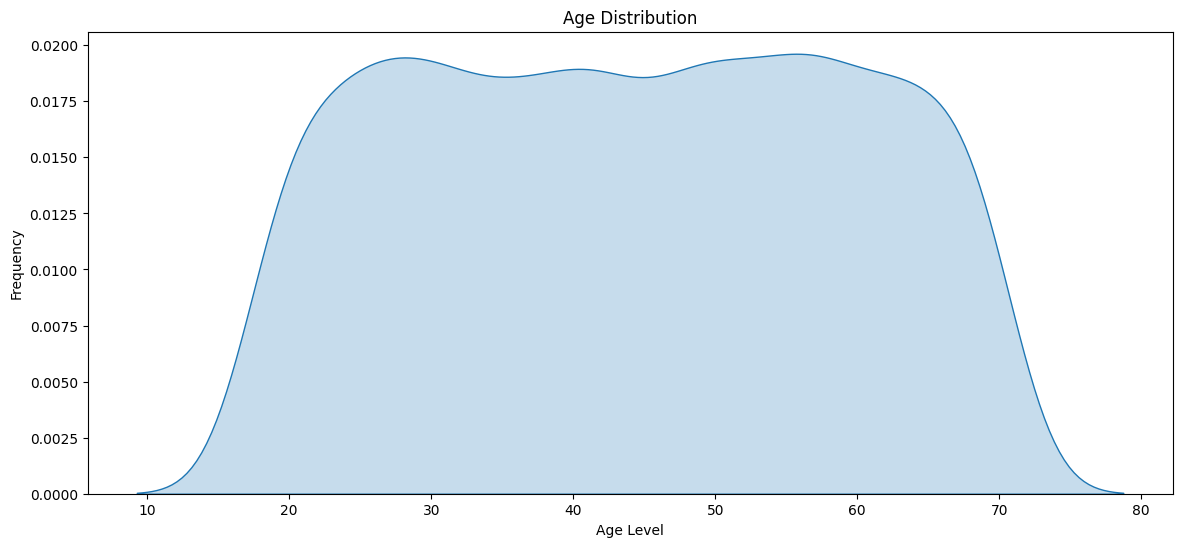

In [13]:
plt.figure(figsize=(14, 6))
sns.kdeplot(df["Age"], fill=True, palette="set2")
plt.title('Age Distribution')
plt.xlabel('Age Level')
plt.ylabel('Frequency')
plt.show()

*Gender Column*

In [14]:
df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

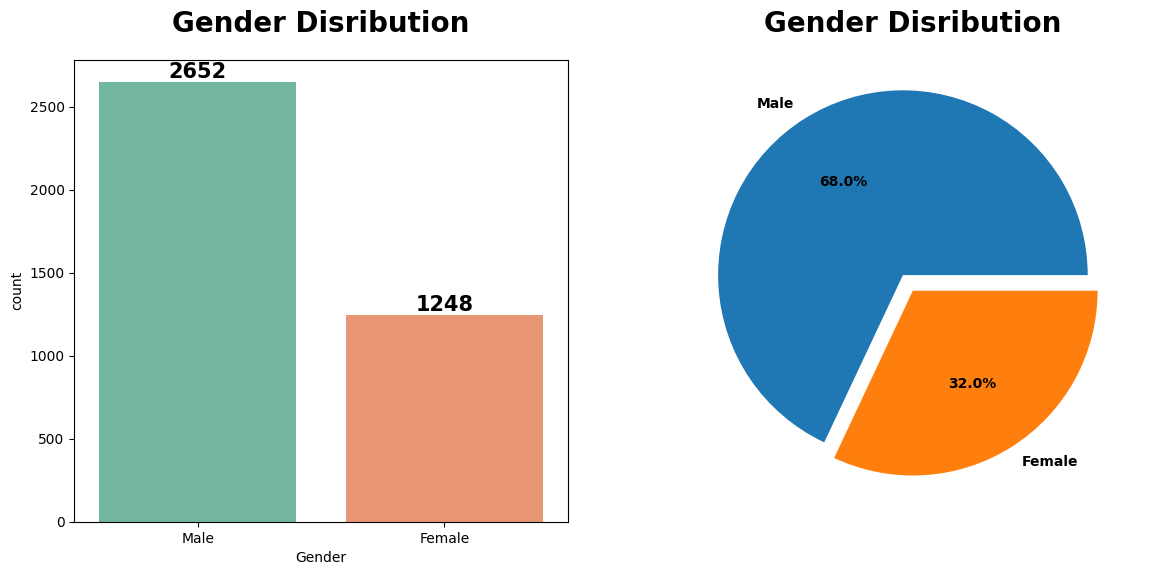

In [15]:
count = df["Gender"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Gender',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Gender')
plt.title("Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0])
plt.title("Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

Item Purchased Column

In [16]:
df["Item_Purchased"].value_counts()

Item_Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

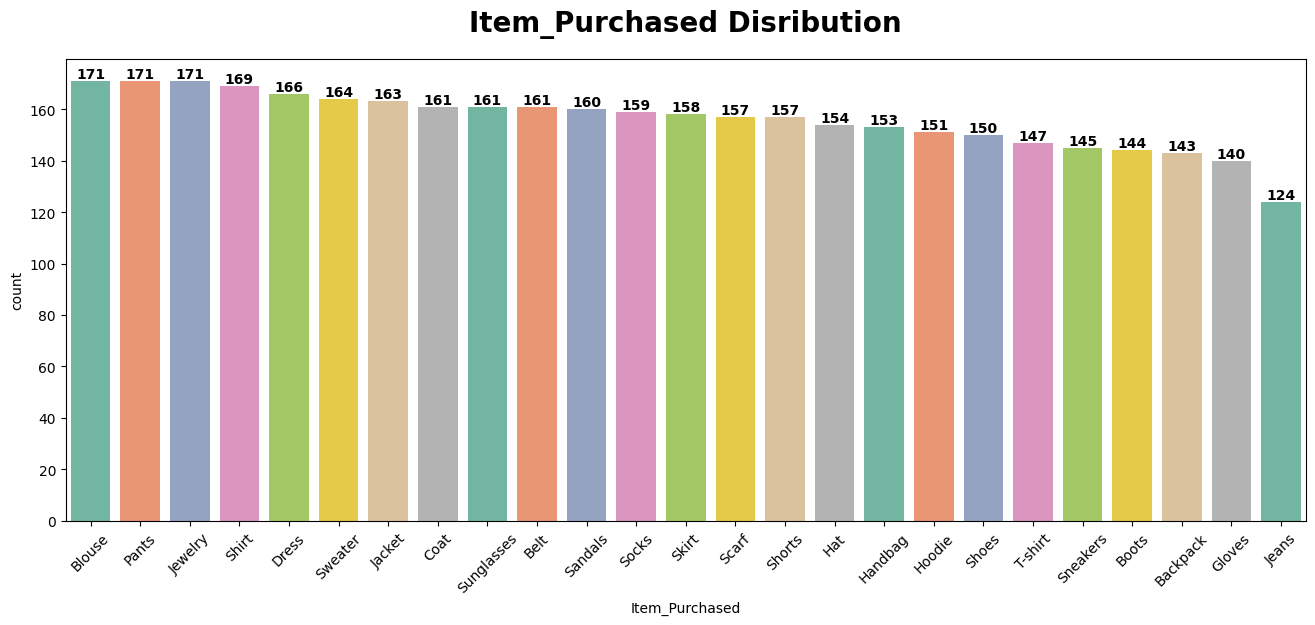

In [17]:
Item_Purchased_order = df['Item_Purchased'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(16,6))
ax=sns.countplot(data=df, x='Item_Purchased', order =Item_Purchased_order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=10)
plt.xlabel('Item_Purchased')
plt.xticks(rotation=45)
plt.title("Item_Purchased Disribution",fontweight="black",size=20,pad=20)
plt.show()

Category Column

In [18]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

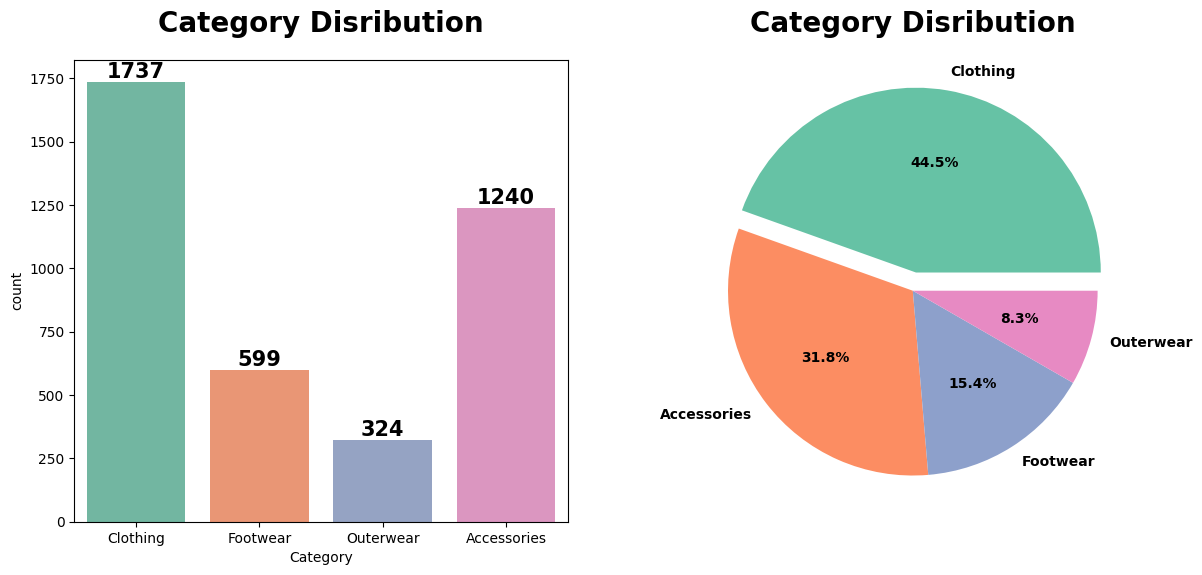

In [19]:
count = df["Category"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Category',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Category')
plt.title("Category Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0])
plt.title("Category Disribution",fontweight="black",size=20,pad=20)
plt.show()

Purchase Amount USD Column

In [20]:
df["Purchase_Amount_USD"].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase_Amount_USD, dtype: float64

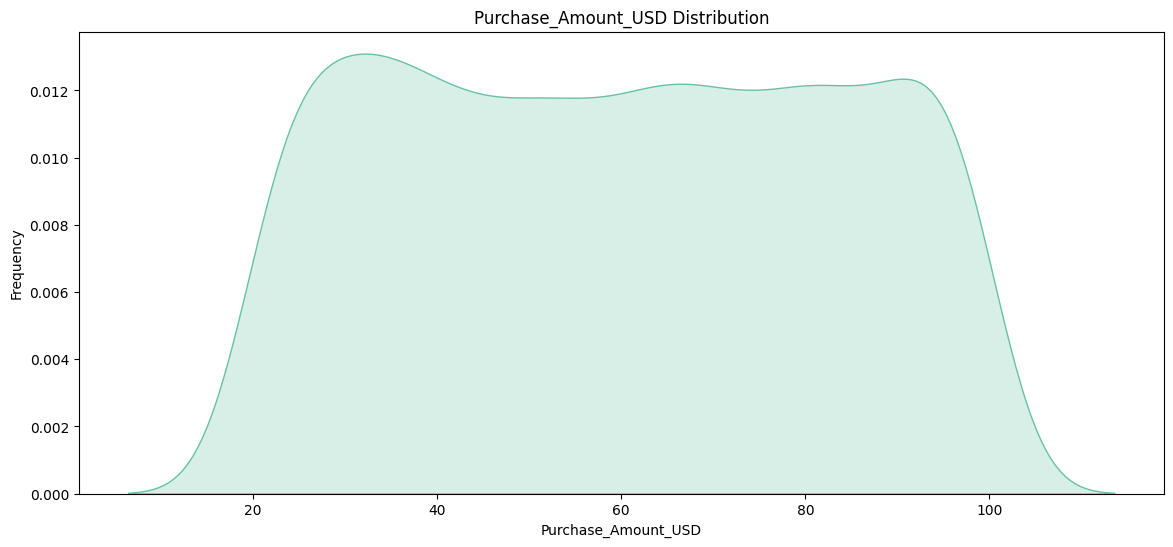

In [21]:
plt.figure(figsize=(14, 6))
sns.kdeplot(df["Purchase_Amount_USD"], fill=True, palette="set2")
plt.title('Purchase_Amount_USD Distribution')
plt.xlabel('Purchase_Amount_USD')
plt.ylabel('Frequency')
plt.show()

Location Column

In [22]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

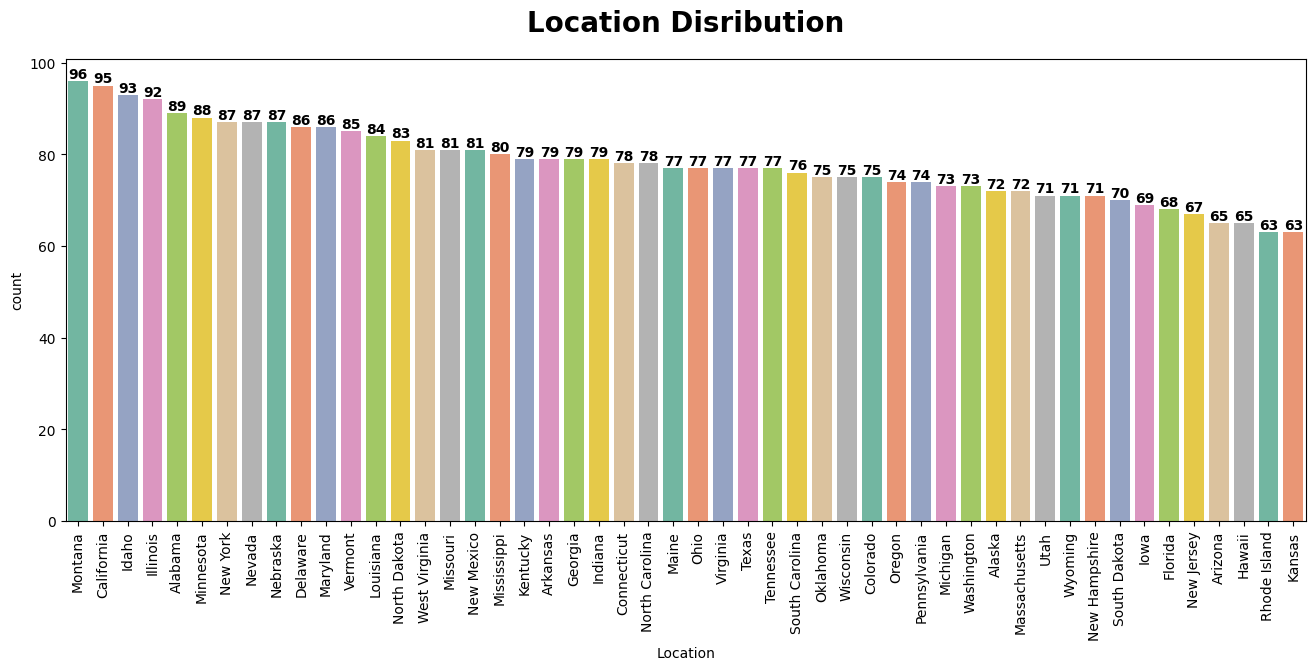

In [23]:
location_order = df['Location'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(16,6))
ax=sns.countplot(data=df, x='Location', order=location_order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=10)
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.title("Location Disribution",fontweight="black",size=20,pad=20)
plt.show()

Size Column

In [24]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

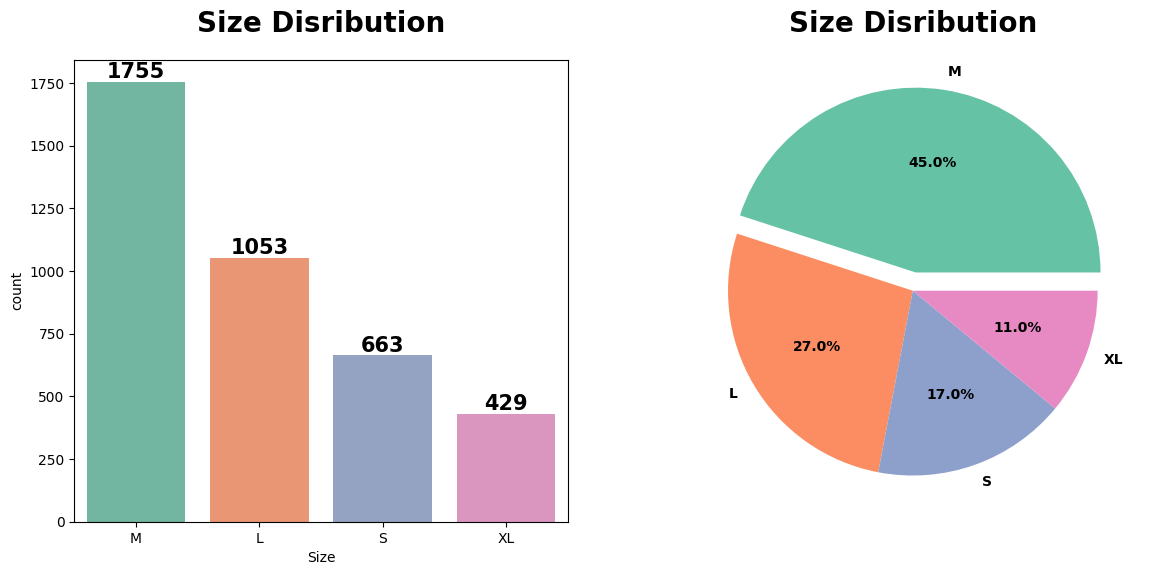

In [25]:
count = df["Size"].value_counts()
size_order = df['Size'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Size', order=size_order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Size')
plt.title("Size Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0])
plt.title("Size Disribution",fontweight="black",size=20,pad=20)
plt.show()

Color Column

In [26]:
df['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

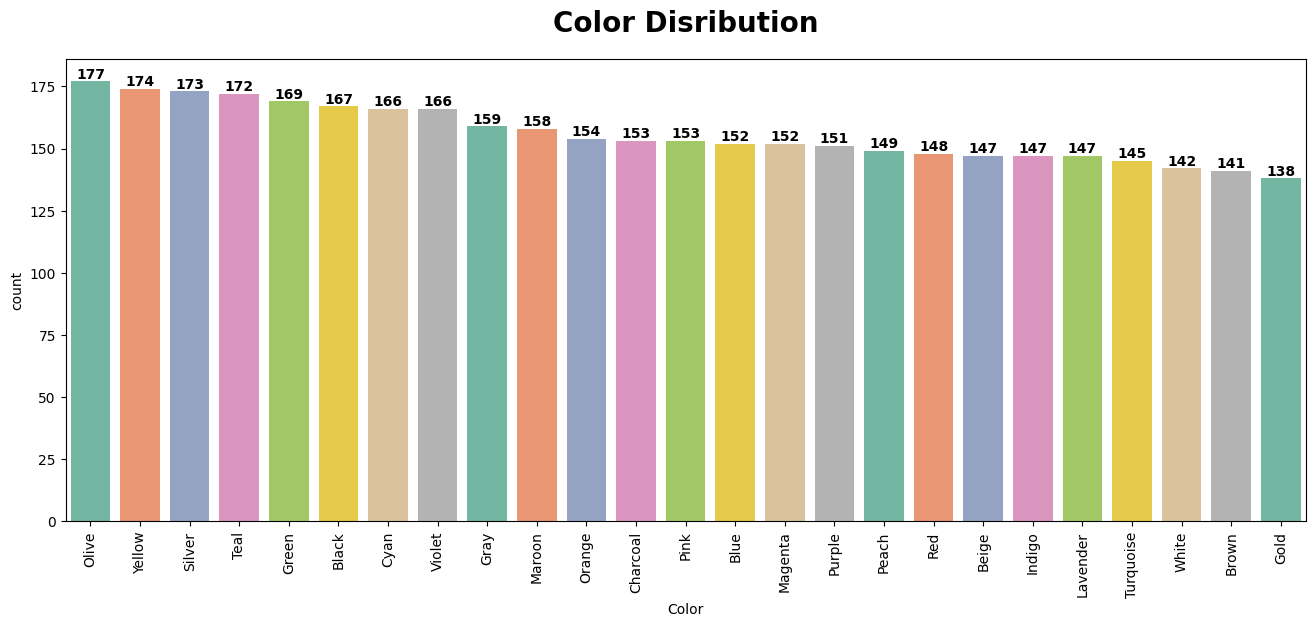

In [27]:
color_order = df['Color'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(16,6))
ax=sns.countplot(data=df, x='Color', order= color_order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=10)
plt.xlabel('Color')
plt.xticks(rotation=90)
plt.title("Color Disribution",fontweight="black",size=20,pad=20)
plt.show()

Season Column

In [28]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

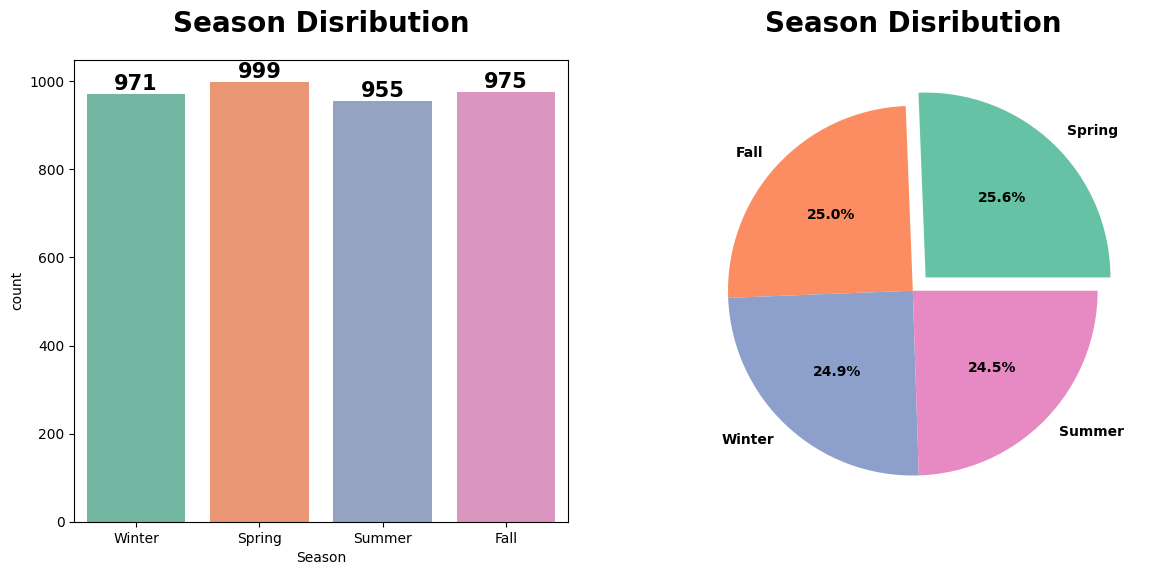

In [29]:
count = df["Season"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Season',palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Season')
plt.title("Season Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0])
plt.title("Season Disribution",fontweight="black",size=20,pad=20)
plt.show()

Review Rating Column

In [30]:
df['Review_Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review_Rating, dtype: float64

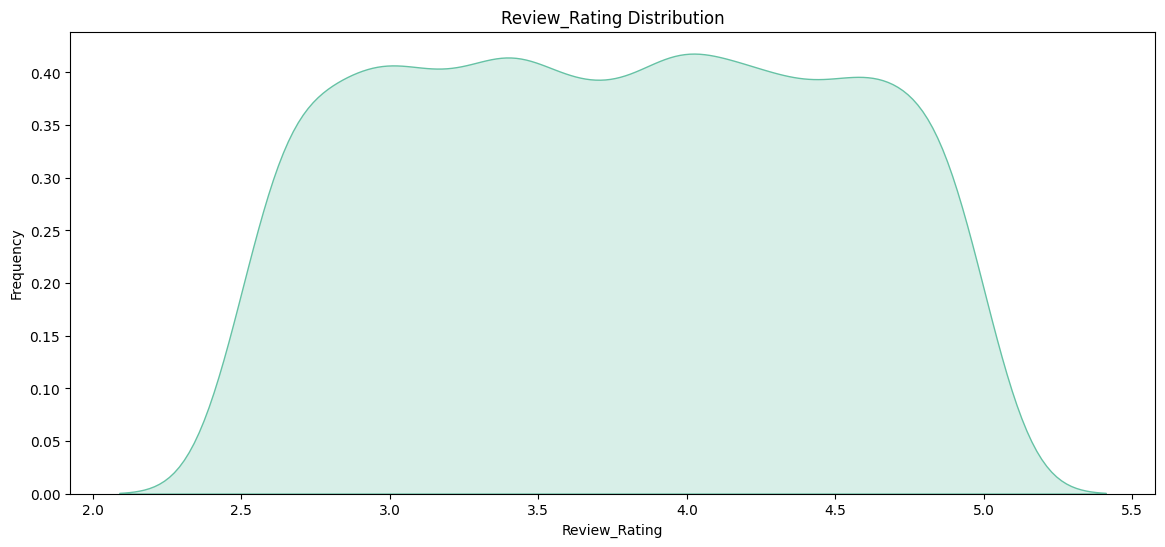

In [31]:
plt.figure(figsize=(14, 6))
sns.kdeplot(df["Review_Rating"], fill=True, palette="set2")
plt.title('Review_Rating Distribution')
plt.xlabel('Review_Rating')
plt.ylabel('Frequency')
plt.show()

Subscription Status Column

In [32]:
df['Subscription_Status'].value_counts()

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

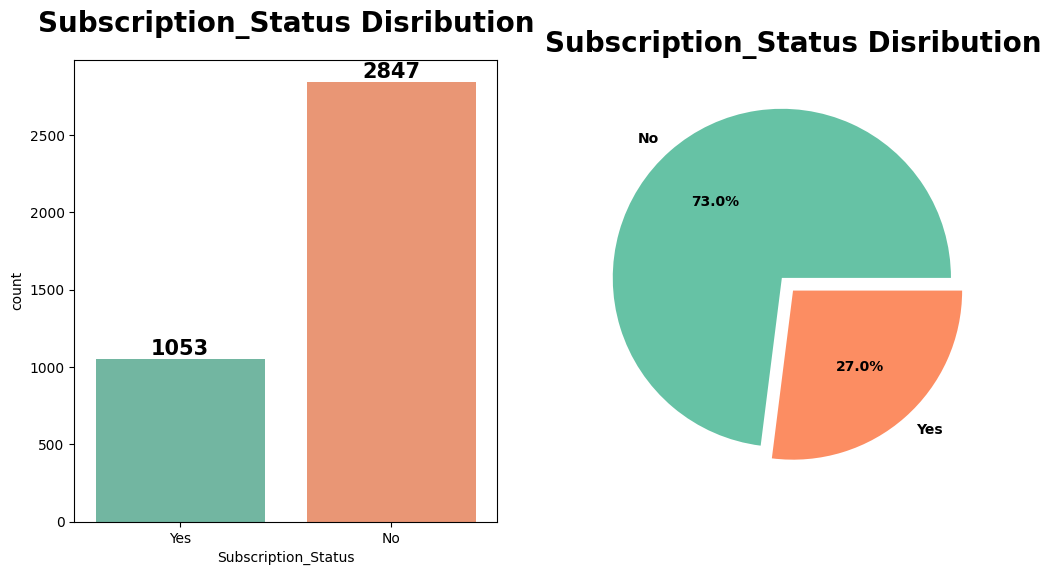

In [48]:
count = df['Subscription_Status'].value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(data=df, x="Subscription_Status", palette="Set2")
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=15)
plt.xlabel('Subscription_Status')
plt.title("Subscription_Status Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0])
plt.title("Subscription_Status Disribution",fontweight="black",size=20,pad=20)
plt.show()


Payment Method Column

In [34]:
df["Payment_Method"].value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

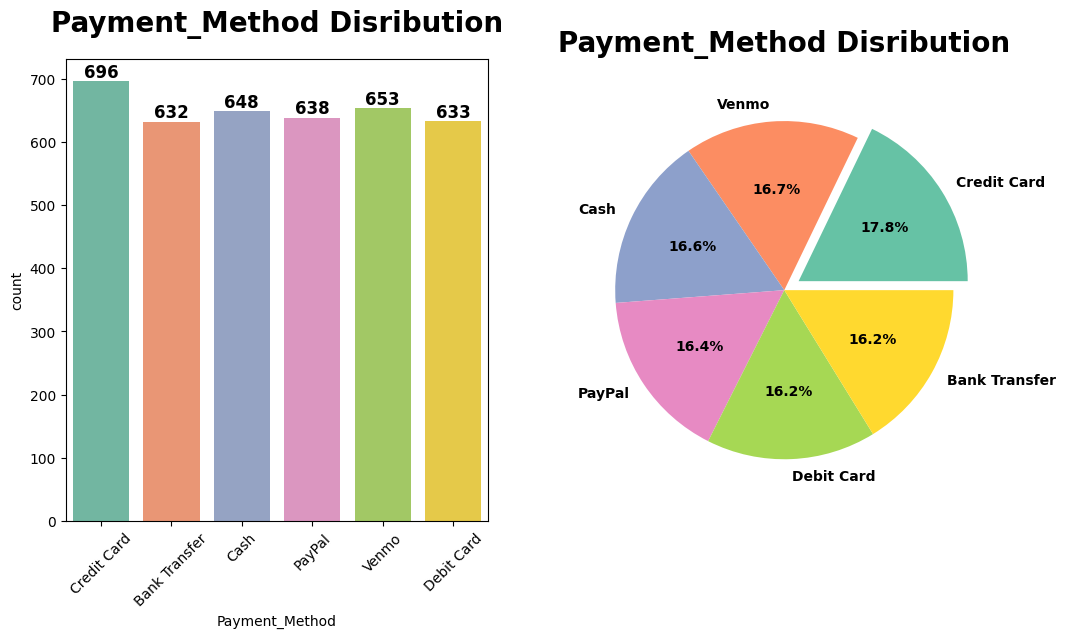

In [35]:
count = df['Payment_Method'].value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(data=df, x="Payment_Method", palette="Set2")
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=12)
plt.xlabel('Payment_Method')
plt.xticks(rotation=45)
plt.title("Payment_Method Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0, 0, 0])
plt.title("Payment_Method Disribution",fontweight="black",size=20,pad=20)
plt.show()

Shipping Type Column

In [36]:
df['Shipping_Type'].value_counts()

Shipping_Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

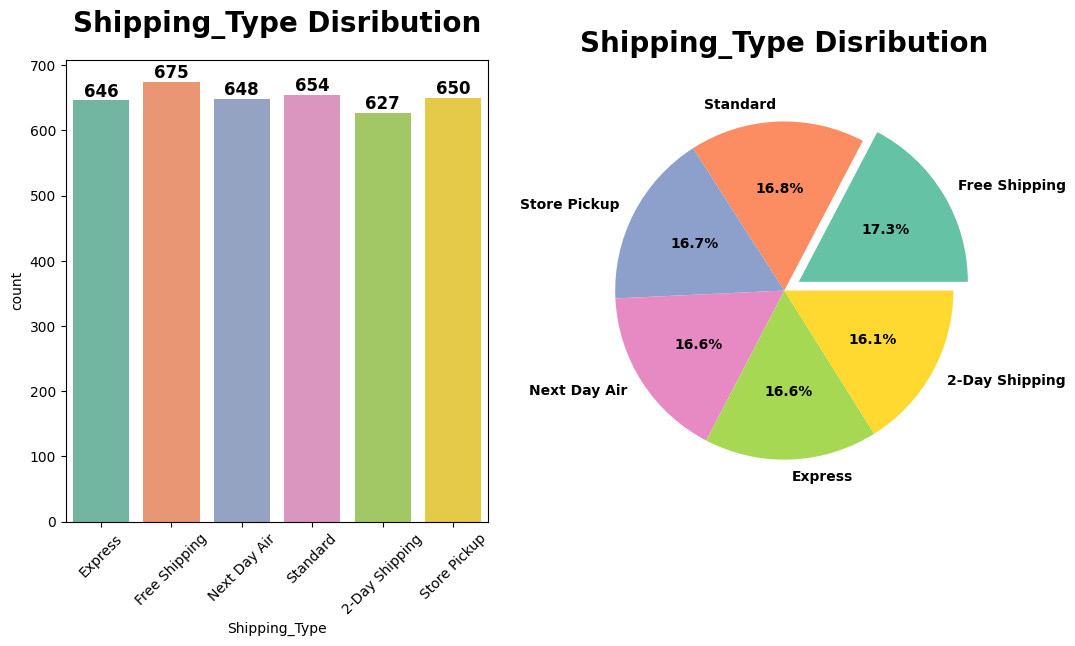

In [37]:
count = df['Shipping_Type'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Shipping_Type', palette="Set2", )
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=12)
plt.xlabel('Shipping_Type')
plt.xticks(rotation=45)
plt.title("Shipping_Type Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0, 0, 0])
plt.title("Shipping_Type Disribution",fontweight="black",size=20,pad=20)
plt.show()

Discount Applied Column

In [38]:
df['Discount_Applied'].value_counts()

Discount_Applied
No     2223
Yes    1677
Name: count, dtype: int64

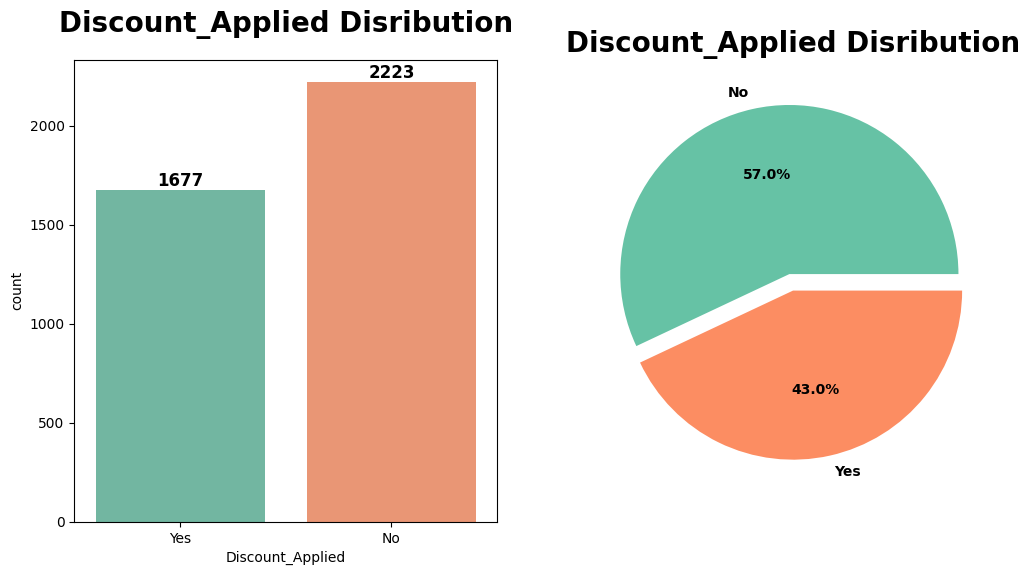

In [39]:
count = df['Discount_Applied'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Discount_Applied', palette="Set2", )
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=12)
plt.xlabel('Discount_Applied')
plt.title("Discount_Applied Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0])
plt.title("Discount_Applied Disribution",fontweight="black",size=20,pad=20)
plt.show()

Promo Code Used Column

In [40]:
df['Promo_Code_Used'].value_counts()

Promo_Code_Used
No     2223
Yes    1677
Name: count, dtype: int64

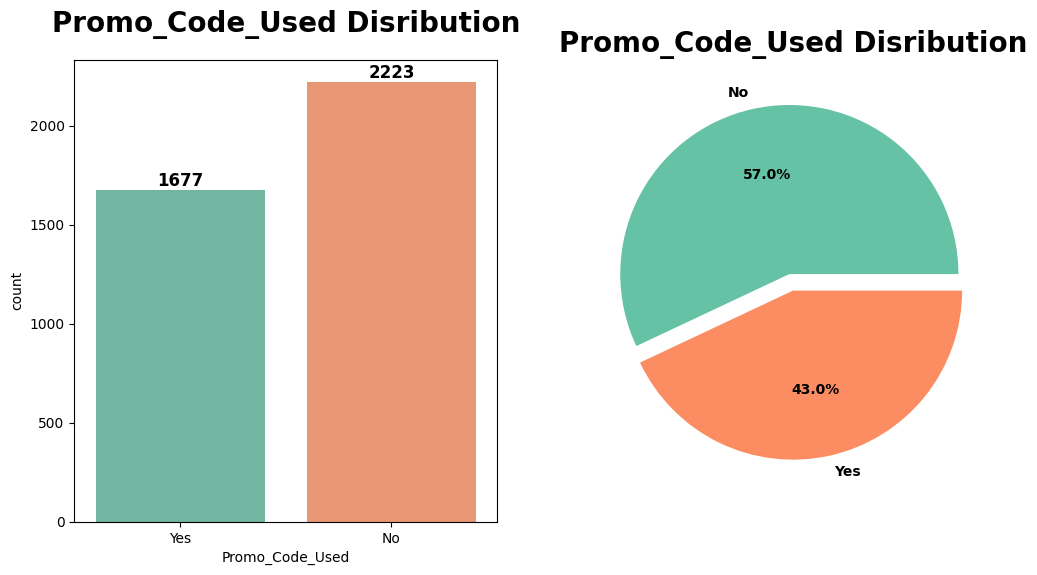

In [41]:
count = df['Promo_Code_Used'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Promo_Code_Used', palette="Set2", )
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=12)
plt.xlabel('Promo_Code_Used')
plt.title("Promo_Code_Used Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0])
plt.title("Promo_Code_Used Disribution",fontweight="black",size=20,pad=20)
plt.show()

Previous Purchases Column

In [42]:
df["Previous_Purchases"].describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous_Purchases, dtype: float64

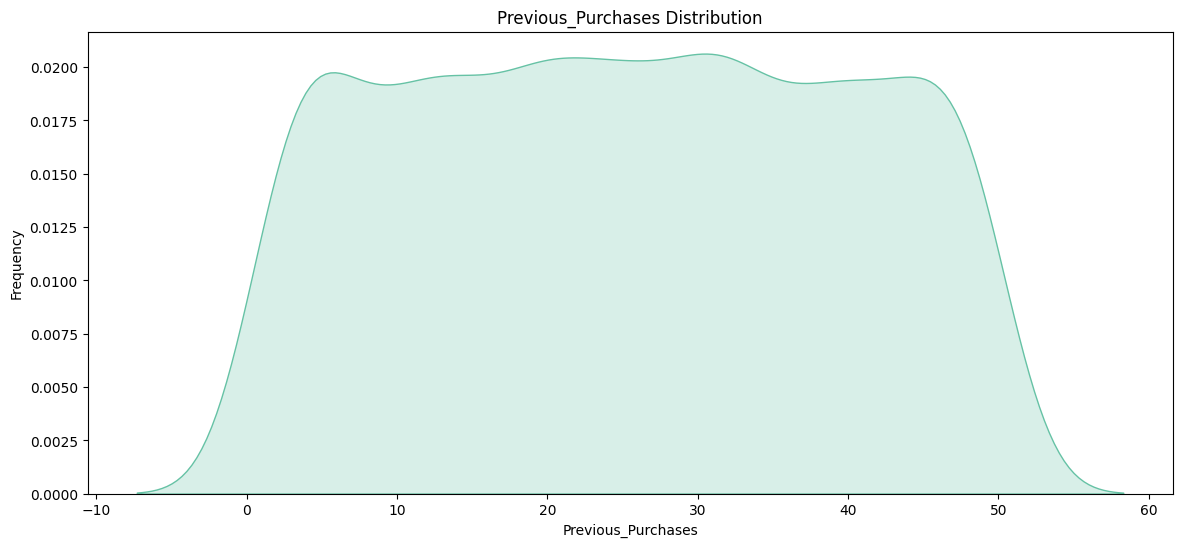

In [43]:
plt.figure(figsize=(14, 6))
sns.kdeplot(df["Previous_Purchases"], fill=True, palette="set2")
plt.title('Previous_Purchases Distribution')
plt.xlabel('Previous_Purchases')
plt.ylabel('Frequency')
plt.show()

Preferred Payment Method Column

In [44]:
df['Preferred_Payment_Method'].value_counts()

Preferred_Payment_Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

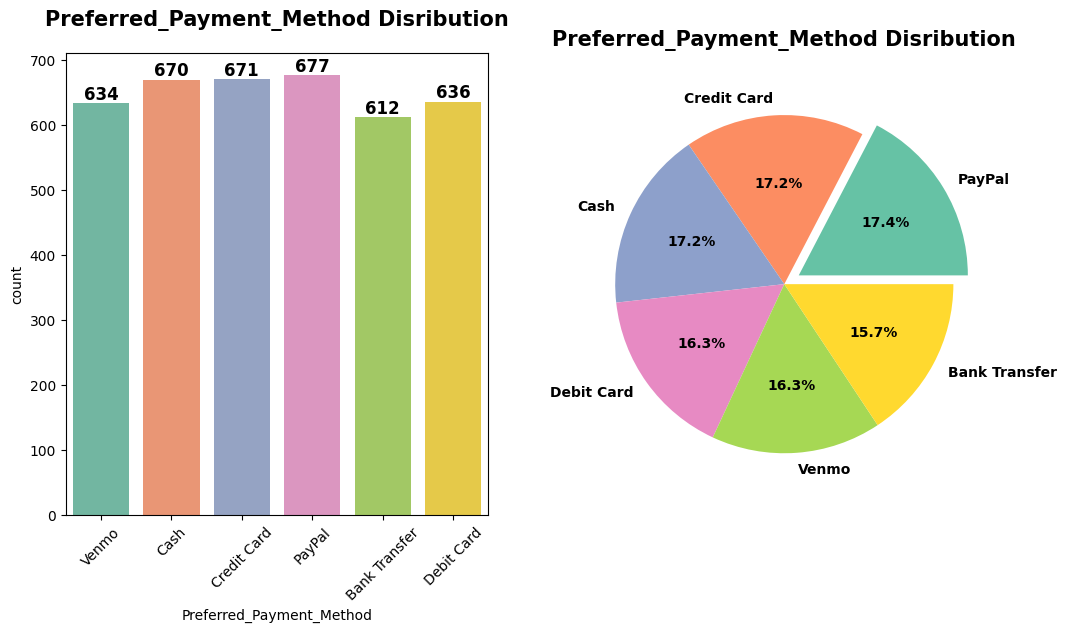

In [45]:
count = df['Preferred_Payment_Method'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Preferred_Payment_Method', palette="Set2", )
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=12)
plt.xlabel('Preferred_Payment_Method')
plt.xticks(rotation=45)
plt.title("Preferred_Payment_Method Disribution",fontweight="black",size=15,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0, 0, 0])
plt.title("Preferred_Payment_Method Disribution",fontweight="black",size=15,pad=20)
plt.show()

Frequency of Purchases Column

In [46]:
df['Frequency_of_Purchases'].value_counts()

Frequency_of_Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

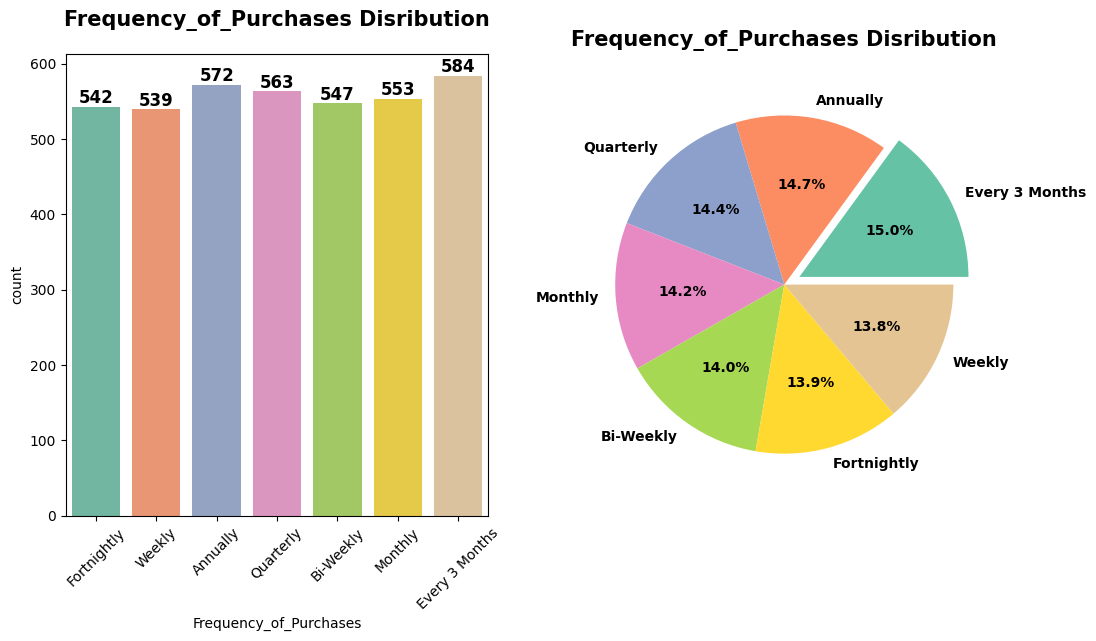

In [47]:
count = df['Frequency_of_Purchases'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Frequency_of_Purchases', palette="Set2", )
for container in ax.containers:
    plt.bar_label(container, fontweight="black", size=12)
plt.xlabel('Frequency_of_Purchases')
plt.xticks(rotation=45)
plt.title("Frequency_of_Purchases Disribution",fontweight="black",size=15,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0, 0, 0, 0])
plt.title("Frequency_of_Purchases Disribution",fontweight="black",size=15,pad=20)
plt.show()

**Bivariate Analysis**

In [49]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


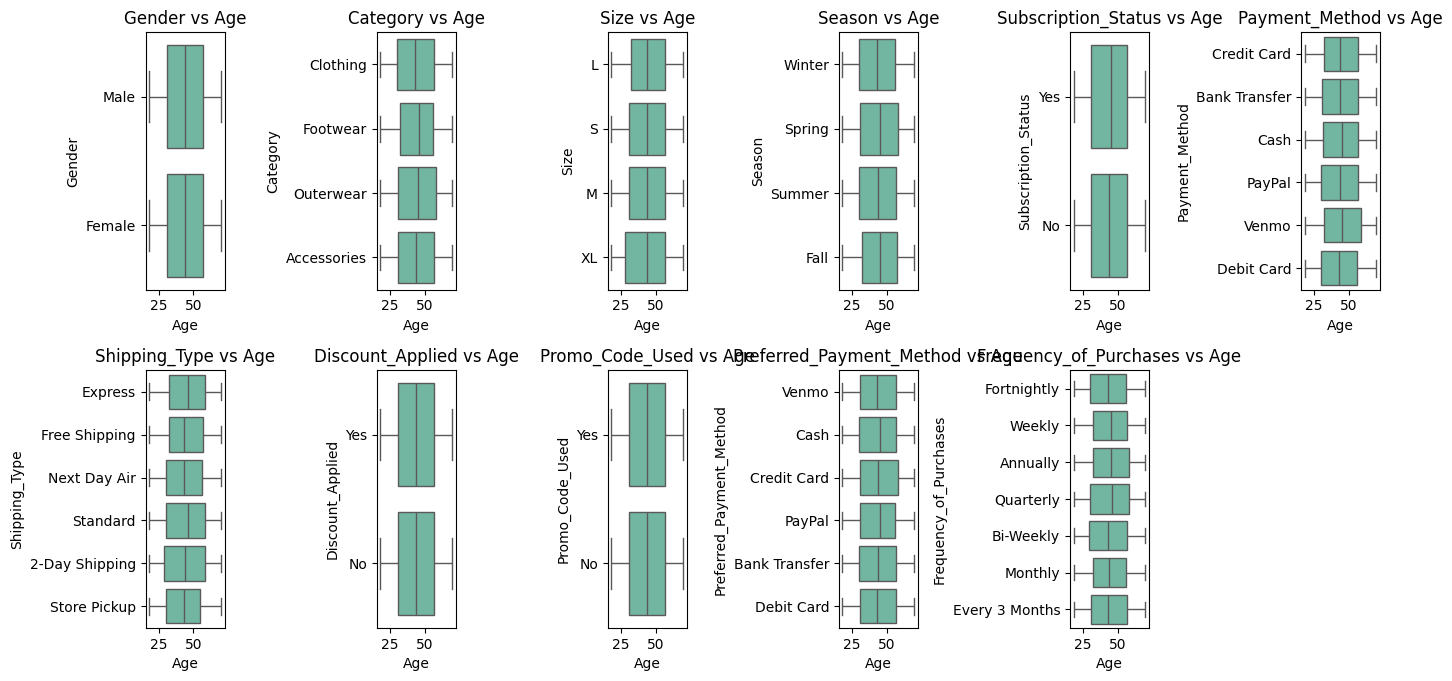

In [72]:
numeric_features = ["Gender", "Category", "Size", "Season", "Subscription_Status", "Payment_Method", "Shipping_Type", "Discount_Applied", "Promo_Code_Used",
                    "Preferred_Payment_Method", "Frequency_of_Purchases"]

plt.figure(figsize=(14, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x='Age', y=feature, data=df)
    plt.title(f'{feature} vs Age')
    plt.xlabel('Age')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

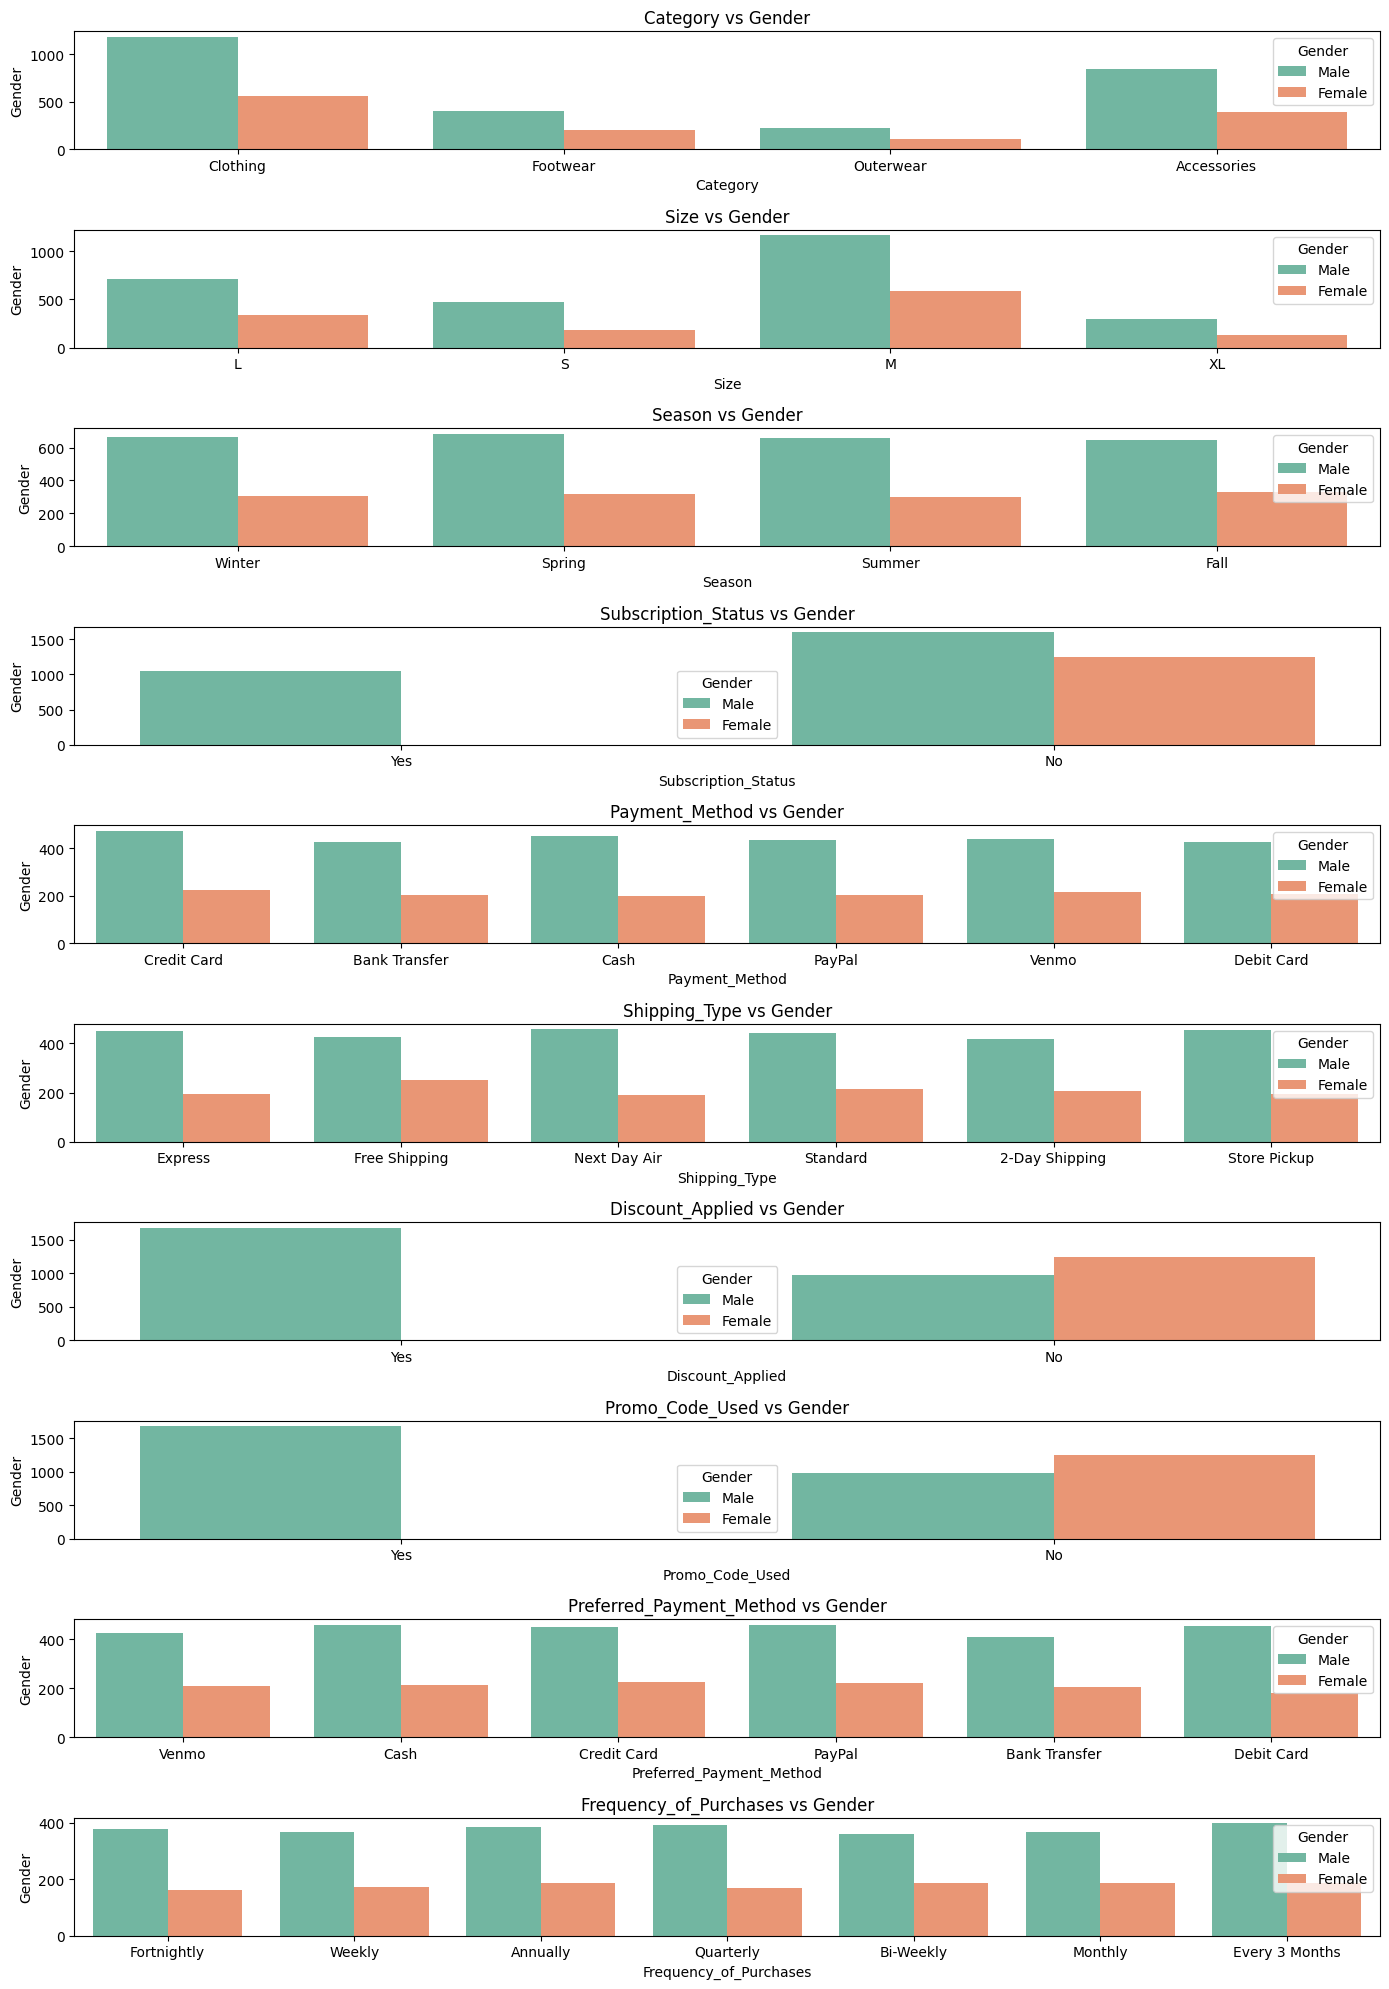

In [75]:
categorical_features = ["Category", "Size", "Season", "Subscription_Status", "Payment_Method", "Shipping_Type", "Discount_Applied", "Promo_Code_Used",
                    "Preferred_Payment_Method", "Frequency_of_Purchases"]

plt.figure(figsize=(14, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(10, 1, i)
    sns.countplot(x=feature, hue='Gender', data=df)
    plt.title(f'{feature} vs Gender')
    plt.xlabel(feature)
    plt.ylabel('Gender')

plt.tight_layout()
plt.show()